In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=c4dd69d65ccb839e0a4f85995d4308b740d4e87b60c9a38edfc82a10ab290b9a
  Stored in directory: c:\users\muskan\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")
from numpy.fft import *
%matplotlib inline


In [4]:
#load the data
train_1=pd.read_csv("train_1.csv.zip")
train_2=pd.read_csv("train_2.csv.zip")
key_1=pd.read_csv("key_1.csv.zip")
key_2=pd.read_csv("key_2.csv.zip")

In [6]:
train_1.head(20)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [7]:
key_2.head()

,Page,Id
0,007_スペクター_ja.wikipedia.org_all-access_all-agen...,0b293039387a
1,007_スペクター_ja.wikipedia.org_all-access_all-agen...,7114389dd824
2,007_スペクター_ja.wikipedia.org_all-access_all-agen...,057b02ff1f09
3,007_スペクター_ja.wikipedia.org_all-access_all-agen...,bd2aca21caa3
4,007_スペクター_ja.wikipedia.org_all-access_all-agen...,c0effb42cdd5


In [8]:
train_1= train_1.fillna(0)
train_2= train_2.fillna

In [9]:
# FUNCTION FOR CREATING ANOTHER COLUMN IN TRAIN DATASET FOR THE PAGE LANGAUGE
def find_lang(page):
    res= re.search("[a-z][a-z].wikipedia.org", page)
    if res:
        return res[0][0:2]
    return("na")

train_1["lang"]= train_1.Page.map(find_lang)

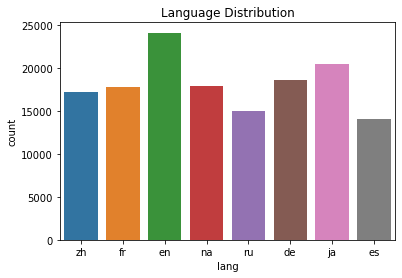

In [10]:
sns.countplot(train_1["lang"])
plt.title("Language Distribution")
plt.show()

In [11]:
lang_set= {}
lang_set["en"]= train_1[train_1.lang=="en"].iloc[:,0:-1]
lang_set["ja"]= train_1[train_1.lang=="ja"].iloc[:,0:-1]
lang_set["de"]= train_1[train_1.lang=="de"].iloc[:,0:-1]
lang_set["na"]= train_1[train_1.lang=="na"].iloc[:,0:-1]
lang_set["fr"]= train_1[train_1.lang=="fr"].iloc[:,0:-1]
lang_set["zh"]= train_1[train_1.lang=="zh"].iloc[:,0:-1]
lang_set["ru"]= train_1[train_1.lang=="ru"].iloc[:,0:-1]
lang_set["es"]= train_1[train_1.lang=="es"].iloc[:,0:-1]

In [12]:
lang_set["en"]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2898.0,2676.0,2032.0,2294.0,2074.0,2175.0,2156.0,2302.0,2098.0,1770.0
8359,"""European_Society_for_Clinical_Investigation""_...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,...,1401.0,1238.0,976.0,810.0,989.0,1332.0,1243.0,1681.0,1303.0,1098.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,...,404.0,344.0,225.0,229.0,335.0,313.0,379.0,393.0,354.0,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,1.0,5.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0
113947,Zillur_Rahman_John_en.wikipedia.org_all-access...,7.0,9.0,3.0,6.0,4.0,2.0,6.0,7.0,6.0,...,3.0,3.0,5.0,4.0,6.0,0.0,7.0,4.0,5.0,7.0
113948,Zitadelle_en.wikipedia.org_all-access_all-agents,10.0,6.0,4.0,8.0,13.0,5.0,9.0,5.0,4.0,...,8.0,6.0,7.0,2.0,8.0,1.0,5.0,7.0,10.0,3.0
113949,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,7.0,4.0,5.0,2.0,7.0,3.0,6.0,4.0,4.0


In [13]:
sums= {}
for key in lang_set:
    sums[key]= lang_set[key].iloc[:,1:].sum(axis= 0) / lang_set["en"].shape[0]

In [14]:
sums["en"]

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Length: 550, dtype: float64

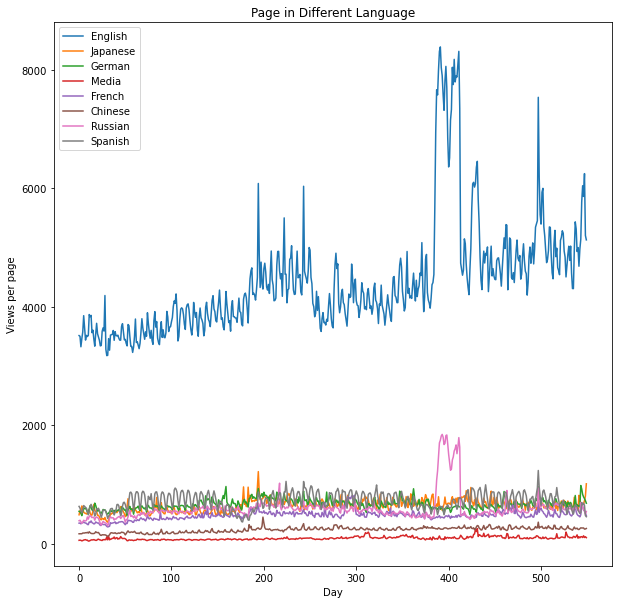

In [15]:
#plot and see individually traffic on particular language
days= [r for r in range(sums["en"].shape[0])]
fig= plt.figure(1, figsize= [10,10])
plt.ylabel("Views per page")
plt.xlabel("Day")
plt.title("Page in Different Language" )
label= {"en":"English", "ja":"Japanese", "de":"German", "na": "Media",
       "fr": "French", "zh": "Chinese", "ru": "Russian", "es": "Spanish"}
for key in sums:
    plt.plot(days, sums[key], label= label[key])
    
plt.legend()
plt.show()

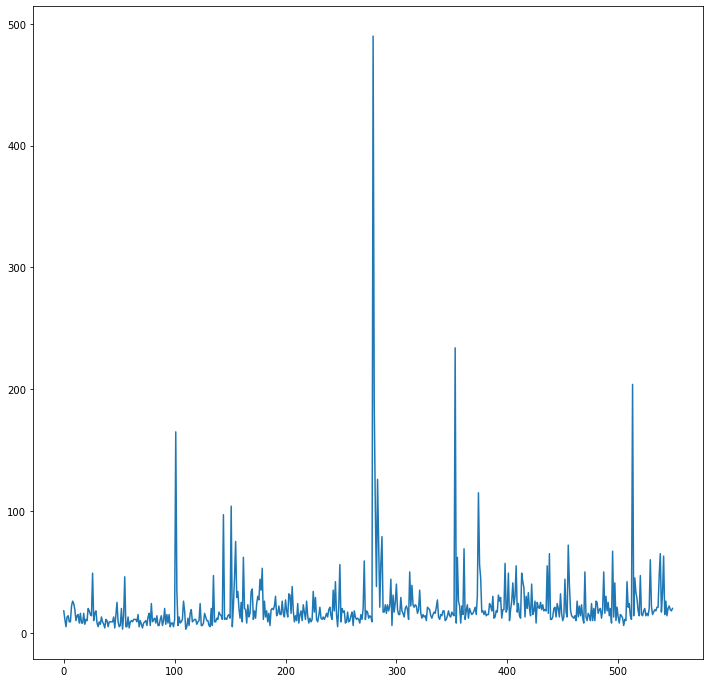

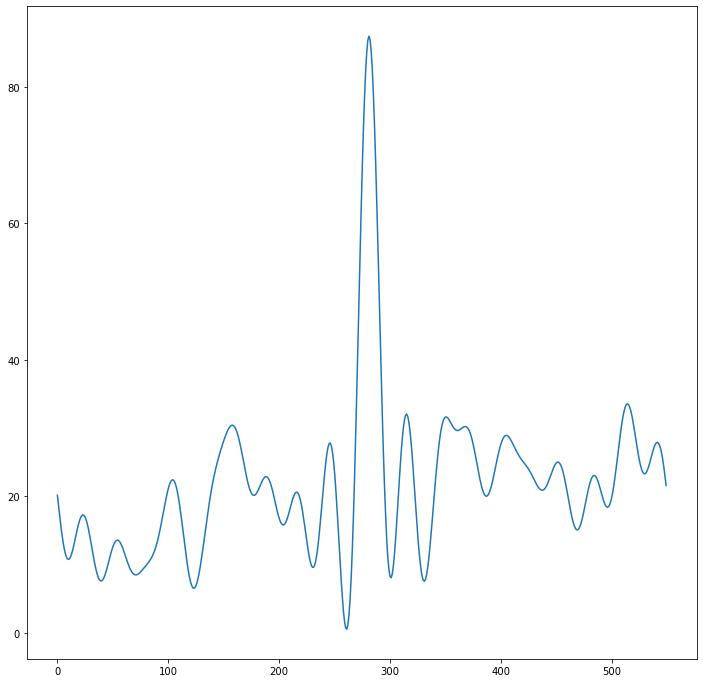

In [16]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

a= np.array(train_1.iloc[0,1:-1],np.float32)
sc= MinMaxScaler()

plt.figure(figsize= (12,12))
plt.plot(a)
plt.show()

plt.figure(figsize= (12,12))
plt.plot(filter_signal(a))
plt.show()

regressor= Sequential()
regressor.add(LSTM(units= 10, activation="relu",return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

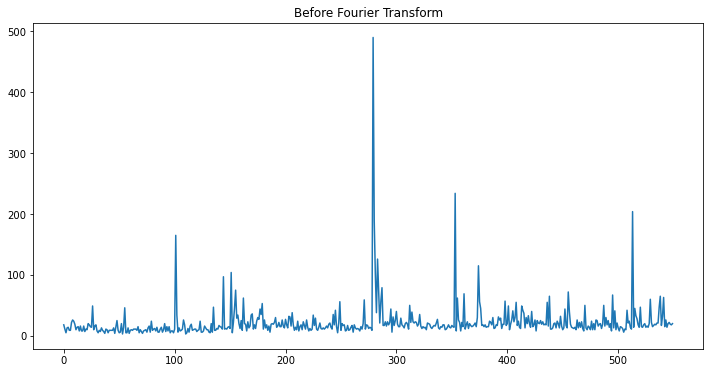

In [17]:
a= np.array(train_1.iloc[0,1:-1],np.float32)

plt.figure(figsize= (12, 6))
plt.title("Before Fourier Transform")
plt.plot(a)

Text(0.5, 1.0, 'After Fourier Transform')

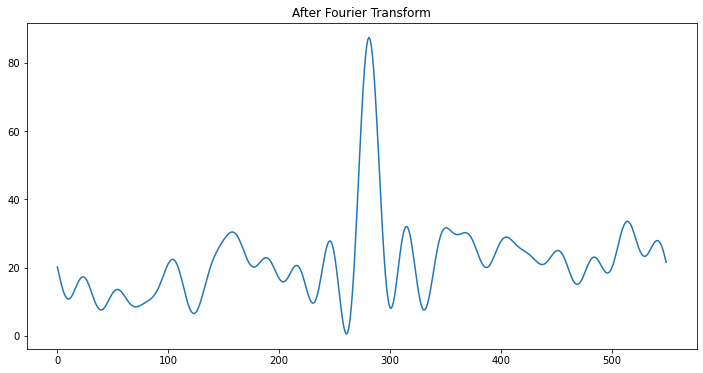

In [18]:
plt.figure(figsize= (12,6))
plt.plot(filter_signal(a))
plt.title("After Fourier Transform")


In [19]:
regressor= Sequential()
regressor.add(LSTM(units= 10, activation="relu",return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

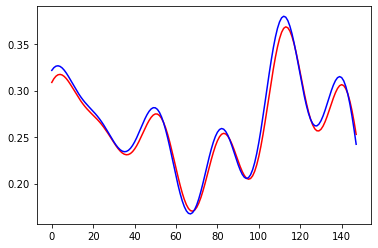

In [20]:
arr= filter_signal(a)
arr= arr.reshape(-1,1)

# performing standardization of values using min max scaler
arr= sc.fit_transform(arr)
arr= np.reshape(arr, (-1,1,1))

# Train data
arr_X= arr[:400]
arr_y= arr[1:401]
arr_X= np.reshape(arr_X, (-1,1,1))

# Test data
arr_TX= arr[401:-1]
arr_ty= arr[402:]
arr_TX= np.reshape(arr_TX, (-1,1,1))
# Training the model
regressor.fit(arr_X, arr_y, batch_size= 5, epochs= 100, verbose= 0)

# perdicting the value
res= regressor.predict(arr_TX)

# Reshaping the value for plotting purpose
res= res.reshape(148,1)
arr_ty= arr_ty.reshape(148,1)

#plotting the data
plt.plot(res, color="r")
plt.plot(arr_ty, color="b")
plt.show()

In [21]:
def plot_entry(key, idx):
    data= lang_set[key].iloc[idx,1:]
    fig= plt.figure(1, figsize= (10, 5))
    plt.plot(days, data)
    plt.xlabel("day")
    plt.ylabel("views")
    plt.title(train_1.iloc[lang_set[key].index[idx],0])
    
    plt.show()

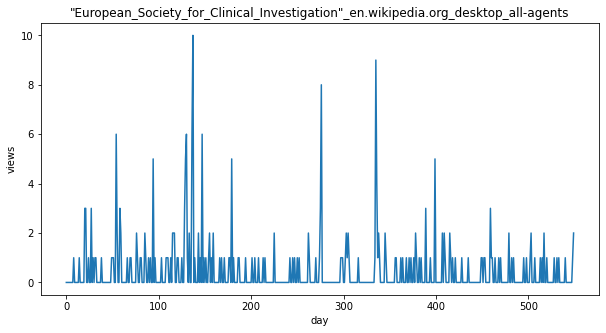

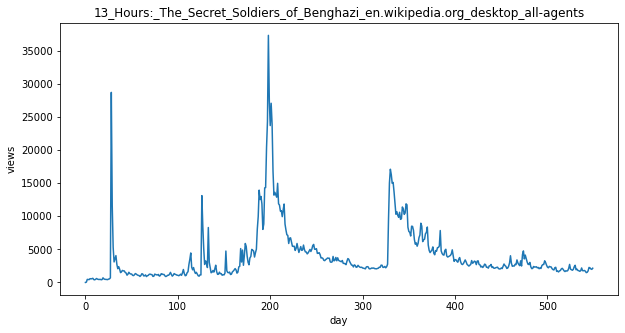

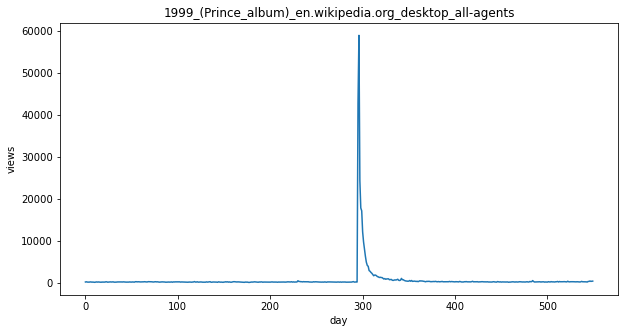

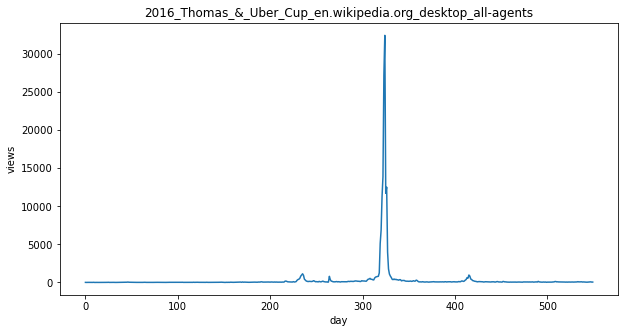

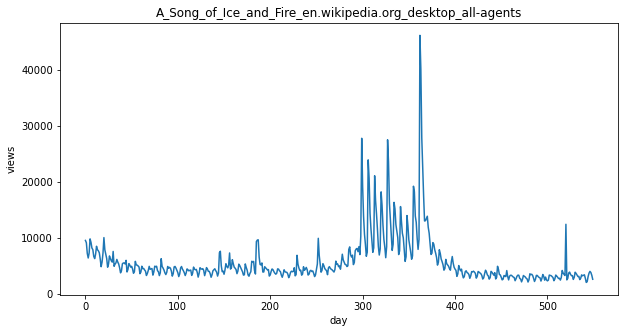

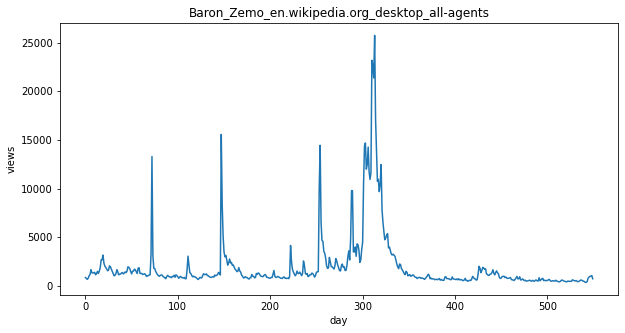

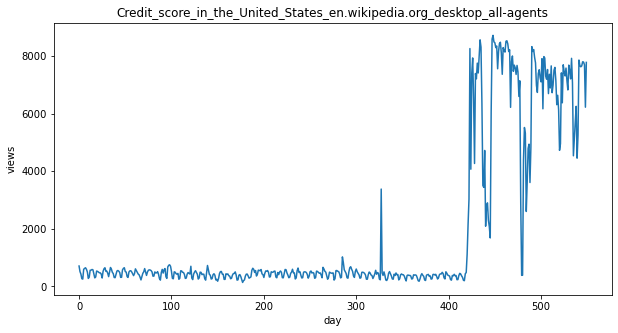

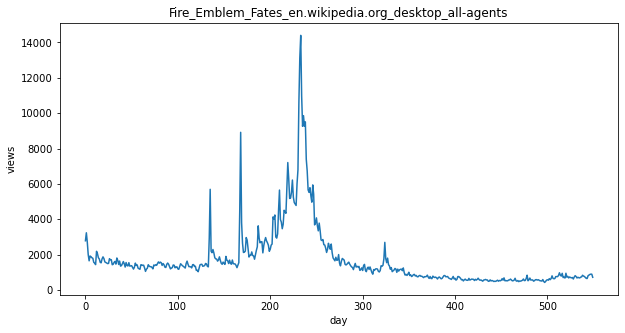

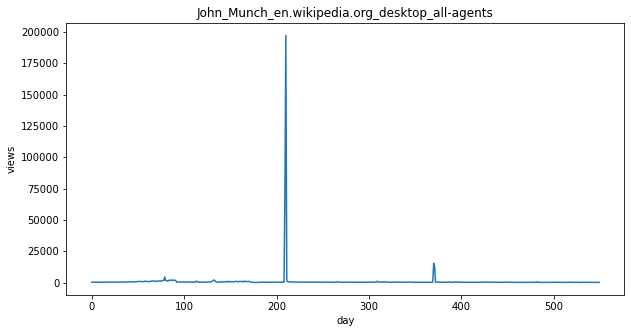

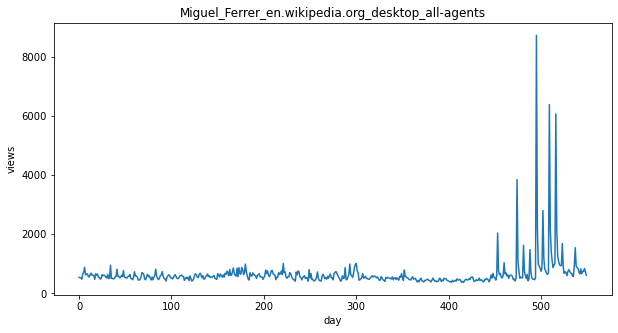

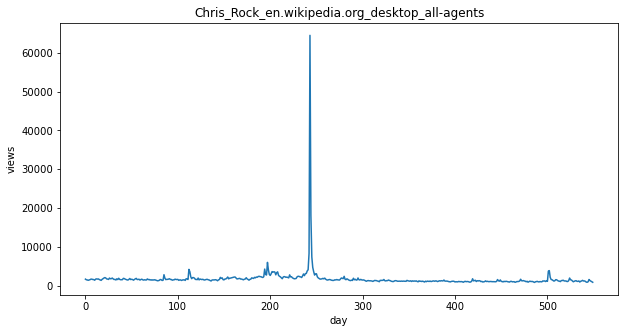

In [22]:
idx= [2, 7, 17, 57, 101, 257, 501, 757, 1117, 1517, 2777]
for i in idx:
    plot_entry("en",i)

In [23]:
#For Finding each page individually counts of no of most most in a Page
# For each language get highest few pages
npages= 5
top_pages= {}
for key in lang_set:
    print(key)
    sum_set= pd.DataFrame(lang_set[key][["Page"]])
    sum_set["Total"]= lang_set[key].sum(axis= 1)
    sum_set = sum_set.sort_values('Total',ascending=False)
    top_pages[key] = sum_set.index[0]
    print(sum_set.head(10))
    print('\n\n')

en
                                                    Page         Total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja
                                                     Page        Total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415

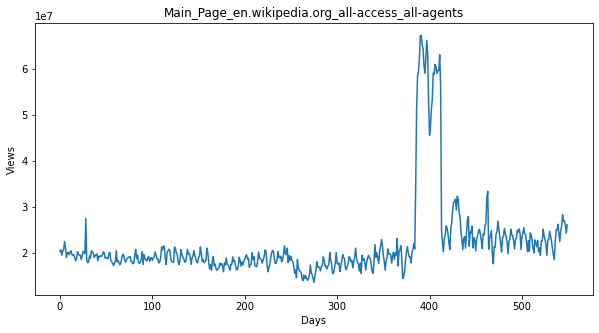

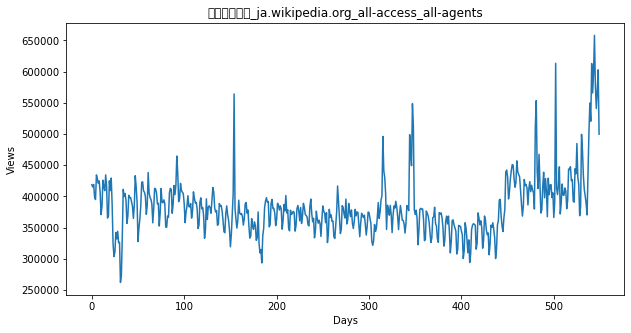

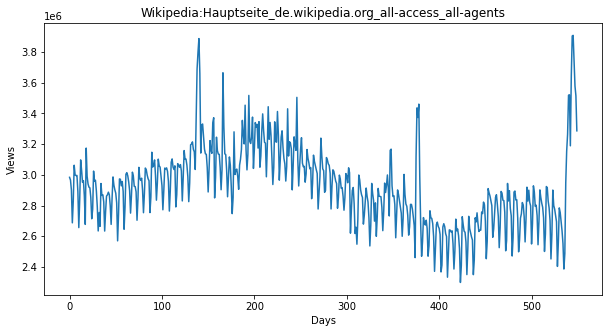

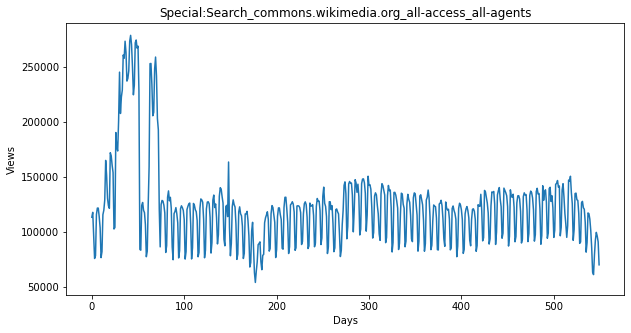

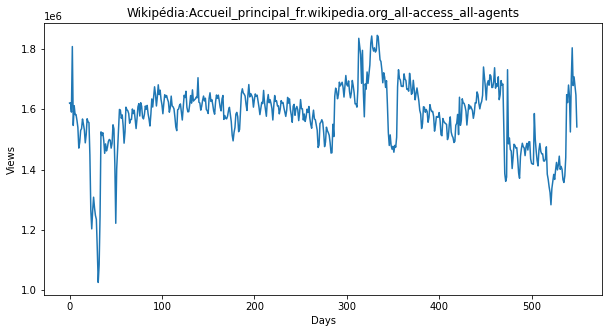

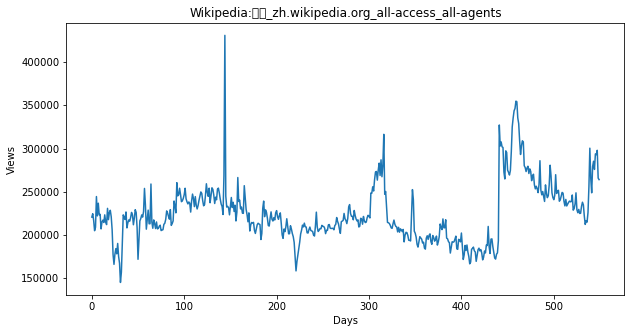

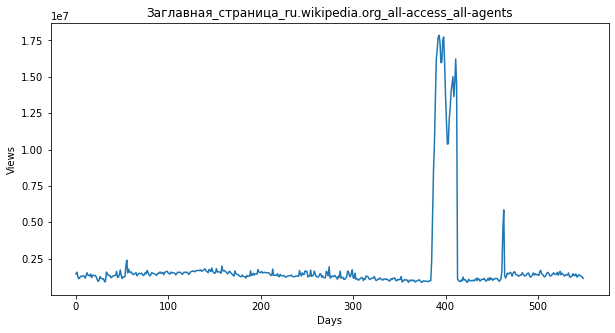

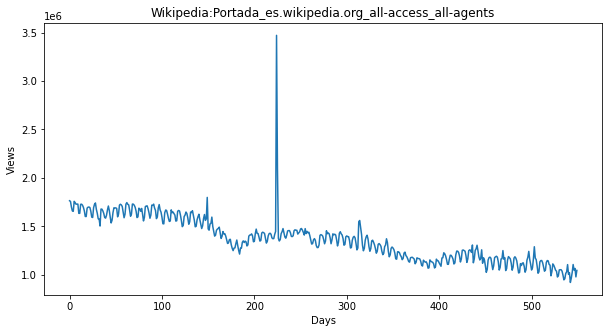

In [24]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train_1.columns
    cols = cols[1:-1]
    data = train_1.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train_1.loc[top_pages[key],'Page'])
    plt.show()

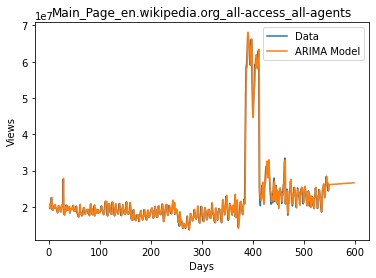

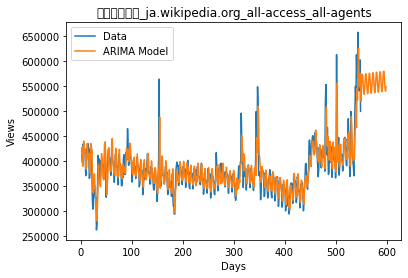

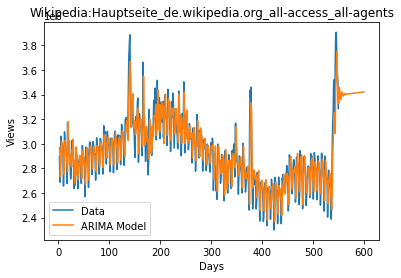

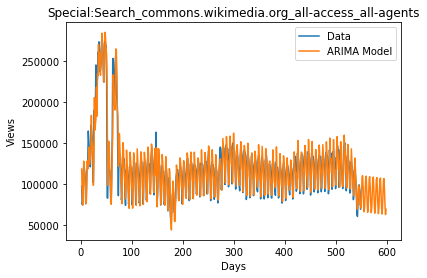

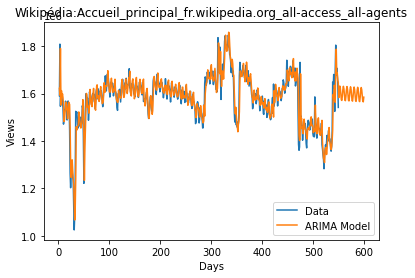

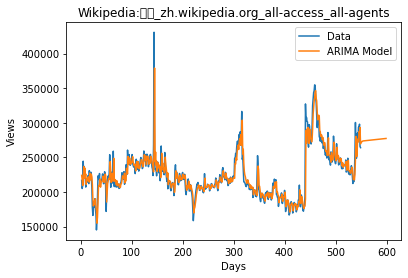

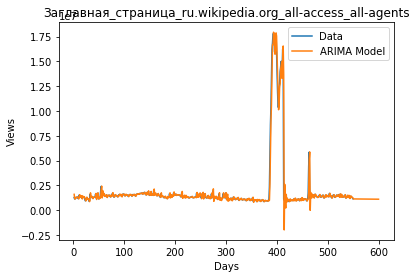

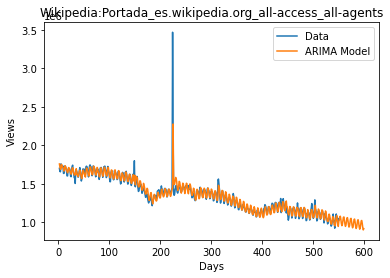

In [25]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols= train_1.columns[1:-1]
for key in top_pages:
    data= np.array(train_1.loc[top_pages[key],cols],"f")
    result= None
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        try:
            arima= ARIMA(data, [2,1,4])
            result= arima.fit(disp= False)
        except:
            try:
                arima= ARIMA(data, [2,1,2])
                result= arima.fit(disp= False)
            except:
                print(train_1.loc[top_pages[key], "Page"])
                print("\tARIMA FAILED")
    pred= result.predict(2,599, typ= "levels")
    x= [i for i in range(600)]
    i=0
    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    plt.title(train_1.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()